Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




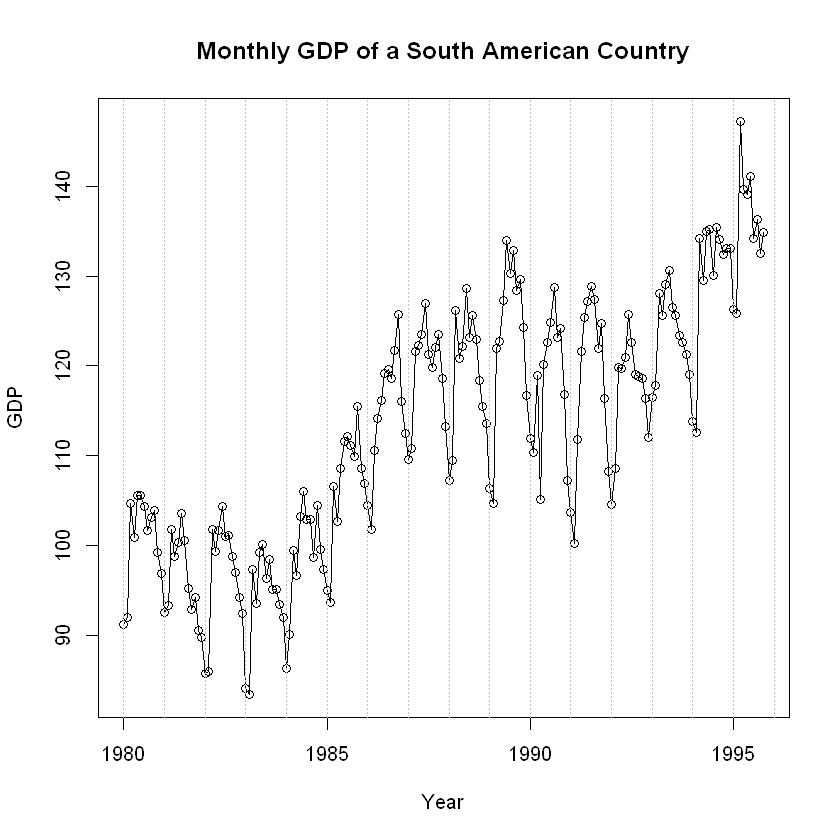

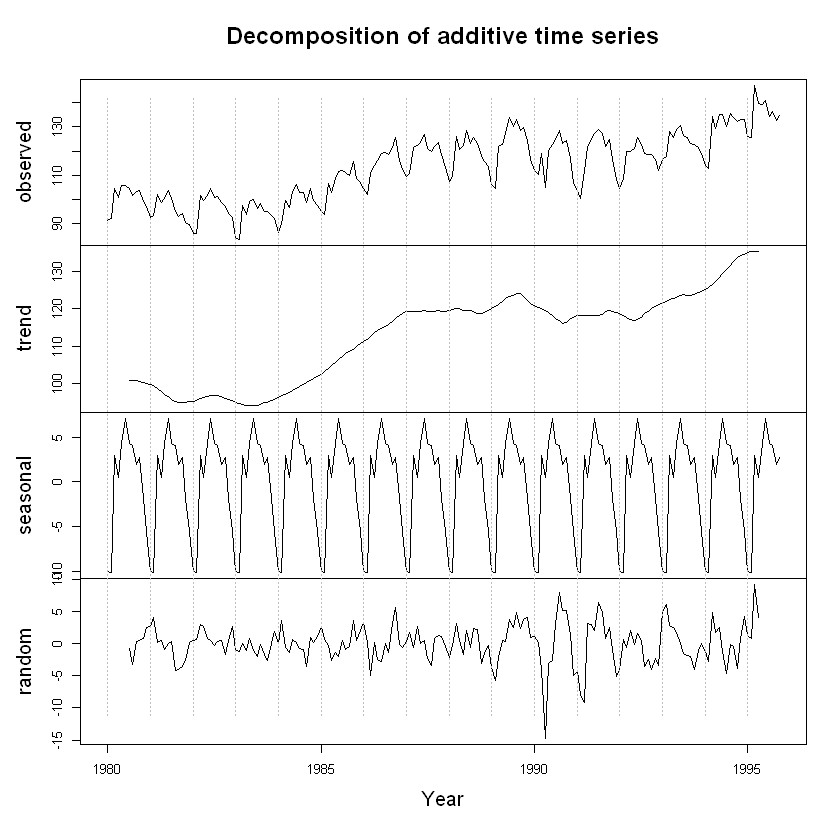

[1] 0.7

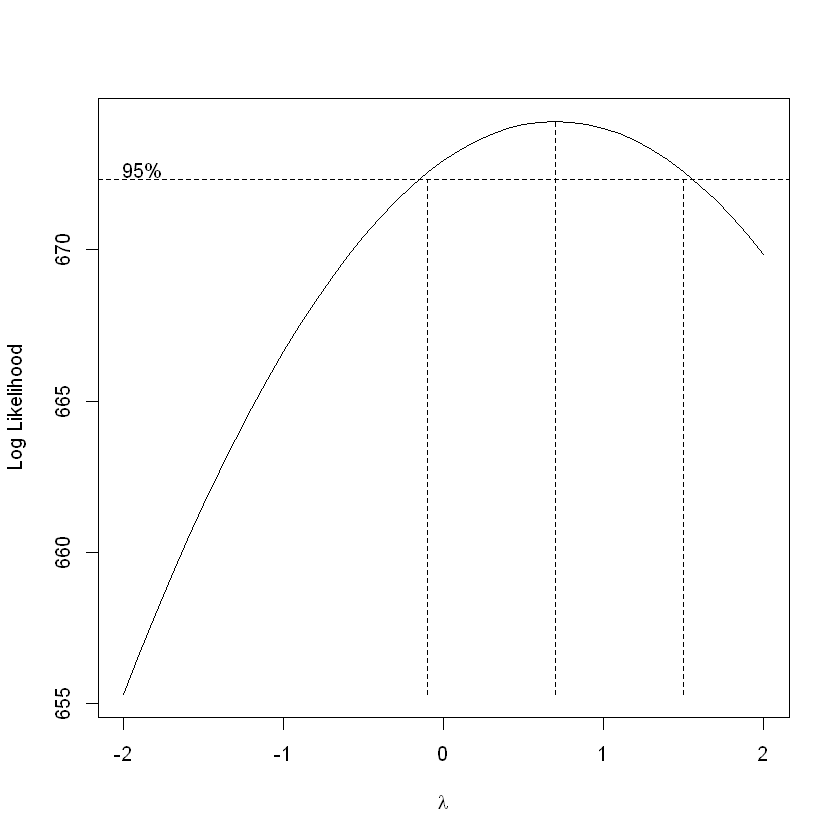

Warning message in adf.test(diff(diff(sqrt.gdp), lag = 12)):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(diff(sqrt.gdp), lag = 12)
Dickey-Fuller = -6.3016, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


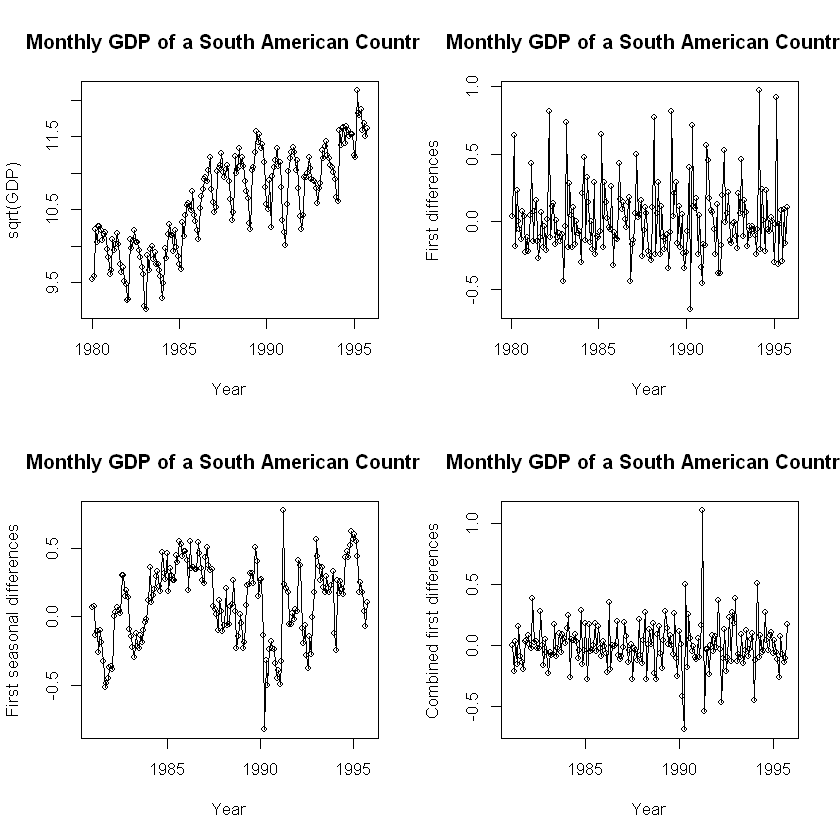

In [1]:
### Time Series Analysis
### Take-Home Data Analysis

### Part 1
library(forecast)
library(TSA)

gdp <- read.table('gdp.txt')


### a)

gdp.training <- gdp[1:190, ] # training set

gdp.test <- gdp[191:dim(gdp)[1], ] # test set

# time series of the training set
gdp.training.ts <- ts(gdp.training, start = 1980, frequency = 12)

# Time series plot
plot(gdp.training.ts, ylab = 'GDP', xlab = 'Year', type='o', main='Monthly GDP of a South American Country')
abline(v=1980:1996, col='grey', lty=3)

# Upward trend with non-constant variation
# Seasonal pattern
# Nonstationary series

# series decomposition
gdp.training.dec <- decompose(gdp.training.ts)

# plot the decomposed series
plot(gdp.training.dec, xlab = 'Year')
abline(v=1980:1996, col='grey', lty=3)

# GDP series=trend+seasonal+random components

gdp.training.bc <- BoxCox.ar(gdp.training.ts) # any need for transformation?

gdp.training.bc$mle # = 0.7
# There might be a need for transformation since 0.7 is
# closer to 0.5. 

# Take square root transformation to stabilize the series

sqrt.gdp <- sqrt(gdp.training.ts)

par(mfrow=c(2,2))

plot(sqrt.gdp, ylab = 'sqrt(GDP)', xlab = 'Year', type='o', main='Monthly GDP of a South American Country')
# Still has trend and seasonal patterns

plot(diff(sqrt.gdp), ylab = 'First differences', xlab = 'Year', type='o', main='Monthly GDP of a South American Country')
# Seasonal pattern still quite pronounced

plot(diff(sqrt.gdp, lag = 12), ylab = 'First seasonal differences', xlab = 'Year', type='o', main='Monthly GDP of a South American Country')
# Doesn't look stationary

plot(diff(diff(sqrt.gdp), lag = 12), ylab = 'Combined first differences', xlab = 'Year', type='o', main='Monthly GDP of a South American Country')
# Now, looks stationary

# Unit root test
library(tseries)  # H0: nonstationary vs H1: stationary
adf.test(diff(diff(sqrt.gdp), lag = 12)) # p-value = 0.01
# We reject the H0 since the p-value < 0.05

# Augmented Dickey-Fuller Test
# 
# data:  diff(diff(sqrt.gdp), lag = 12)
# Dickey-Fuller = -6.3016, Lag order = 5, p-value = 0.01
# alternative hypothesis: stationary

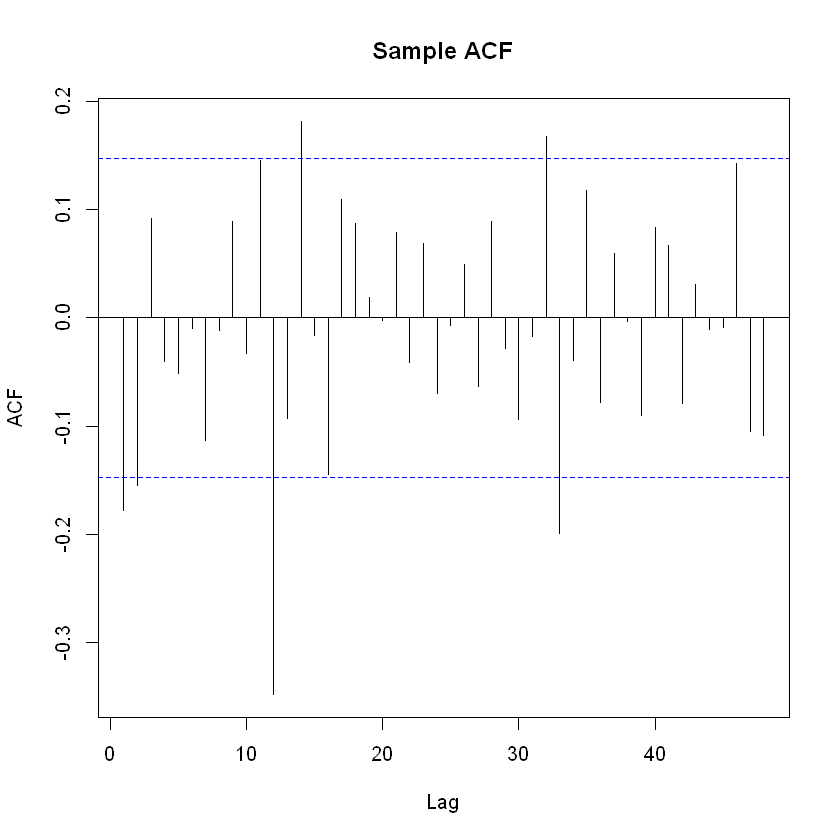

Series: sqrt.gdp 
ARIMA(1,0,3)(1,1,0)[12] with drift 

Coefficients:
         ar1      ma1      ma2     ma3     sar1   drift
      0.8136  -0.0950  -0.0312  0.2171  -0.3501  0.0090
s.e.  0.0699   0.0933   0.0871  0.1008   0.0705  0.0044

sigma^2 = 0.0284:  log likelihood = 66.06
AIC=-118.11   AICc=-117.45   BIC=-95.84

Series: sqrt.gdp 
ARIMA(1,0,0)(1,1,0)[12] with drift 

Coefficients:
         ar1     sar1   drift
      0.8129  -0.3183  0.0090
s.e.  0.0436   0.0710  0.0043

sigma^2 = 0.02948:  log likelihood = 61.45
AIC=-114.91   AICc=-114.67   BIC=-102.18

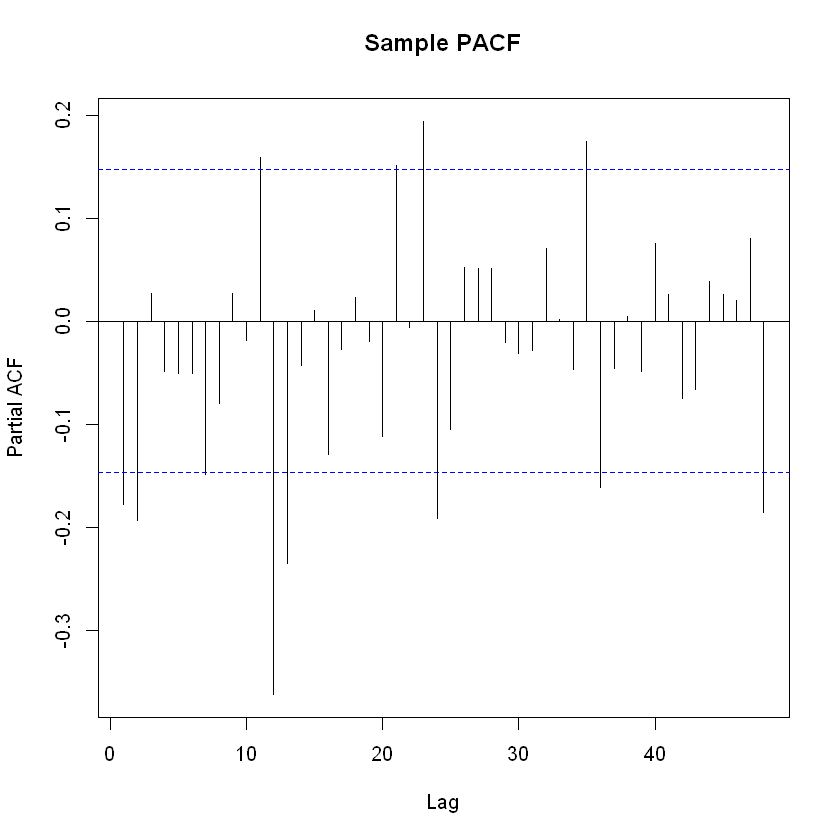

In [2]:
### b)

# We take seasonal and simple differences
gdp.sqrt.diff <- diff(diff(sqrt.gdp), lag = 12)

par(mfrow=c(1,1))
# acf and pacf plots
acf(as.vector(gdp.sqrt.diff), main='Sample ACF', lag.max = 48)
# seasonal lags: 1 signif. spike at lag 12, 1 spike at lag 33????(strange) => SARIMA(0,1,1)_{12}
# simple lags: 1/2 signif. spike(s) at lag(s) 1, 2 => ARIMA(0,1,1) or ARIMA(0,1,2)

pacf(as.vector(gdp.sqrt.diff), main="Sample PACF", lag.max = 48) 
# seasonal lags: 3 signif. spikes at lags 12,24,36, 48 => SARIMA(4,1,0)_{12}
# simple lags: 2 signif. spikes at lags 1, 2 => ARIMA(2,1,0)

# Automatic model selection
library('forecast')

auto.arima(sqrt.gdp, ic='aic') # ARIMA(1,0,3)(1,1,0)[12]

# Series: sqrt.gdp 
# ARIMA(1,0,3)(1,1,0)[12] with drift 
# 
# Coefficients:
#         ar1      ma1      ma2     ma3     sar1   drift
#       0.8136  -0.0950  -0.0312  0.2171  -0.3501  0.0090
# s.e.  0.0699   0.0933   0.0871  0.1008   0.0705  0.0044
# 
# sigma^2 estimated as 0.0284:  log likelihood=66.06
# AIC=-118.11   AICc=-117.45   BIC=-95.84


auto.arima(sqrt.gdp, ic='bic') # ARIMA(1,0,0)(1,1,0)[12]

# Series: sqrt.gdp 
# ARIMA(1,0,0)(1,1,0)[12] with drift 
# 
# Coefficients:
#         ar1     sar1   drift
#       0.8129  -0.3183  0.0090
# s.e.  0.0436   0.0710  0.0043
# 
# sigma^2 estimated as 0.02948:  log likelihood=61.45
# AIC=-114.91   AICc=-114.67   BIC=-102.18

### Suggested candidate models

# i) SARIMA (0,1,1) x (0,1,1)_{12}

# ii) SARIMA (0,1,2) x (0,1,1)_{12}

# iii) SARIMA (2,1,0) x (4,1,0)_{12}

# iv) SARIMA(1,0,3) X (1,1,0)[12]

# v) SARIMA(1,0,0) x (1,1,0)[12]



	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 68.233, df = 22, p-value = 1.251e-06

Model df: 2.   Total lags used: 24



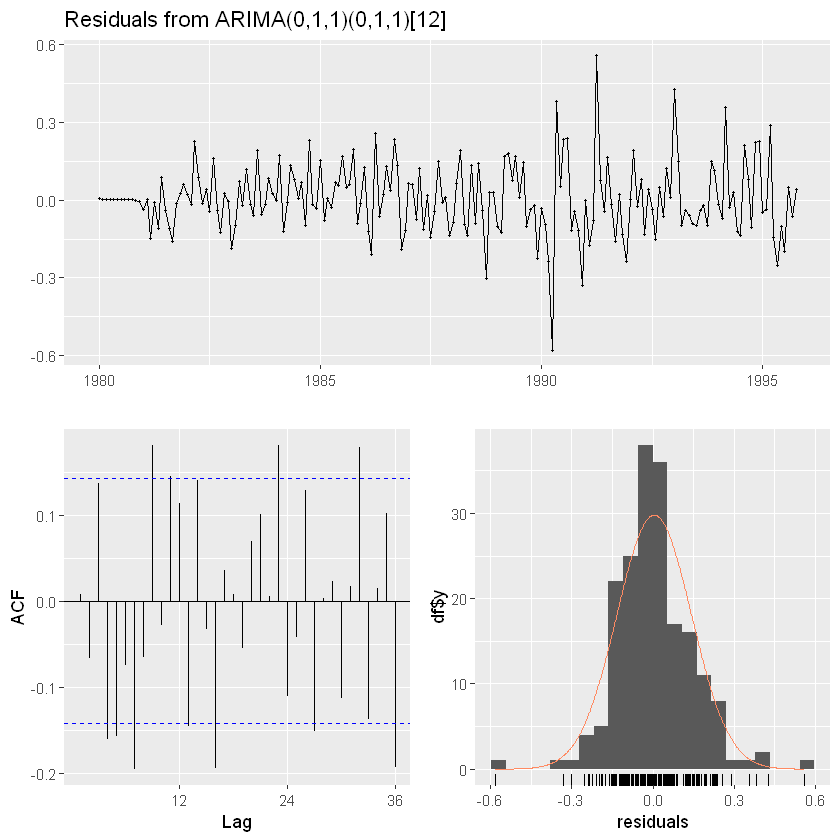


	Ljung-Box test

data:  Residuals from ARIMA(0,1,2)(0,1,1)[12]
Q* = 69.023, df = 21, p-value = 5.036e-07

Model df: 3.   Total lags used: 24



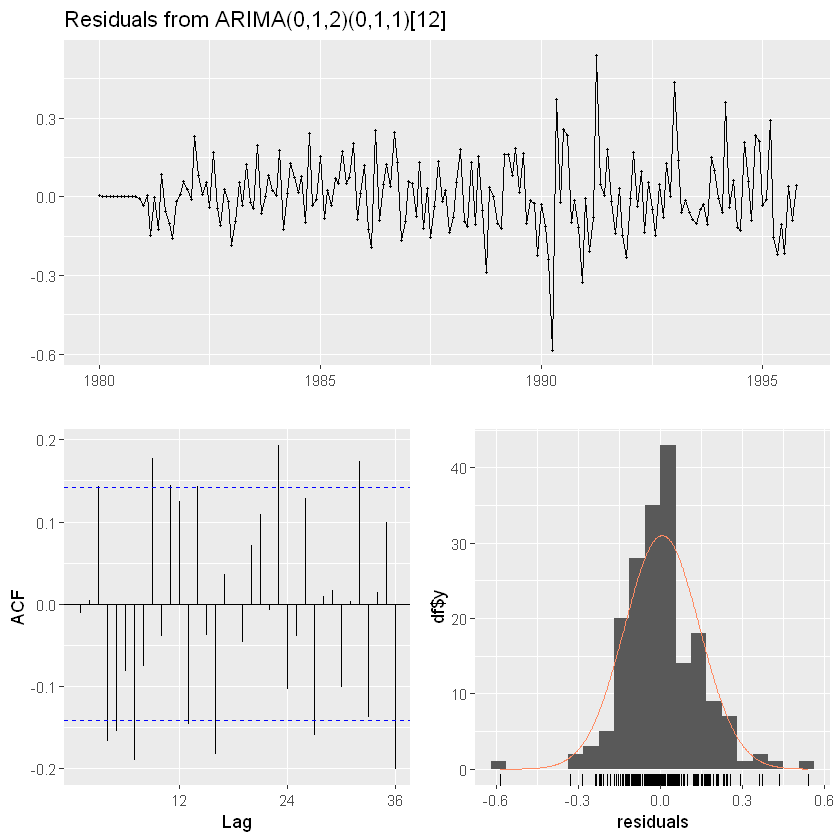


	Ljung-Box test

data:  Residuals from ARIMA(2,1,0)(4,1,0)[12]
Q* = 34.573, df = 18, p-value = 0.01069

Model df: 6.   Total lags used: 24



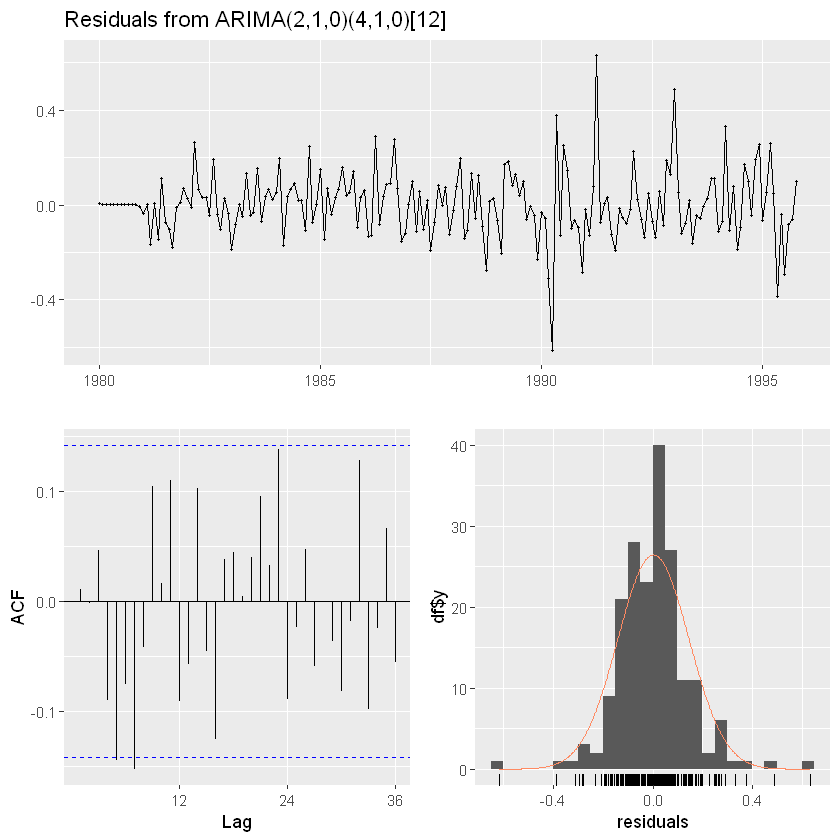


	Ljung-Box test

data:  Residuals from ARIMA(1,0,3)(1,1,0)[12]
Q* = 51.328, df = 19, p-value = 8.335e-05

Model df: 5.   Total lags used: 24



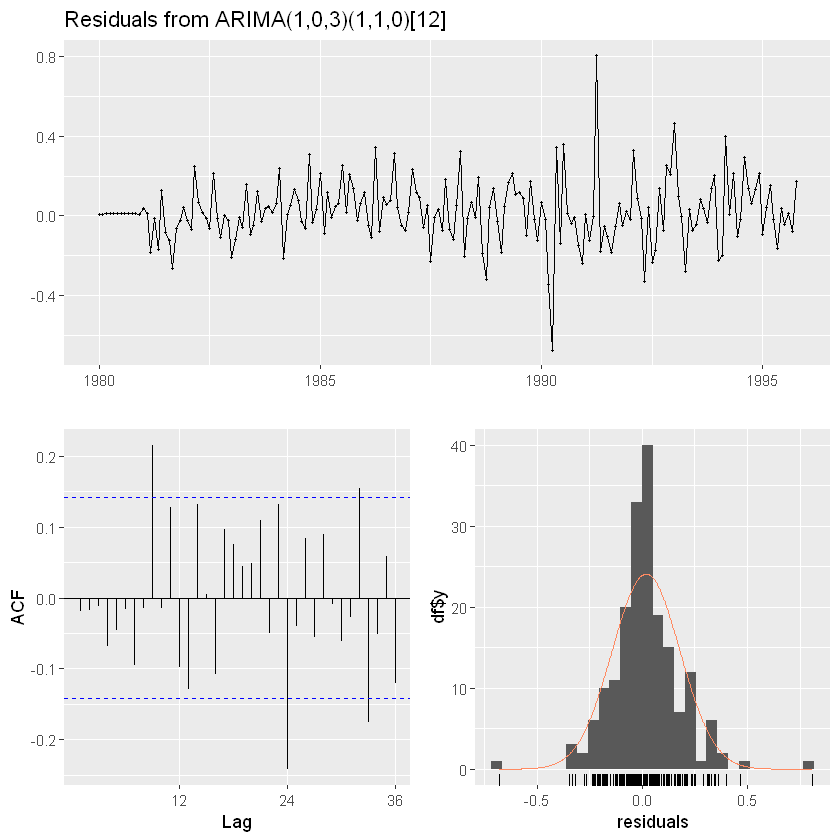


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0)(1,1,0)[12]
Q* = 72.628, df = 22, p-value = 2.536e-07

Model df: 2.   Total lags used: 24



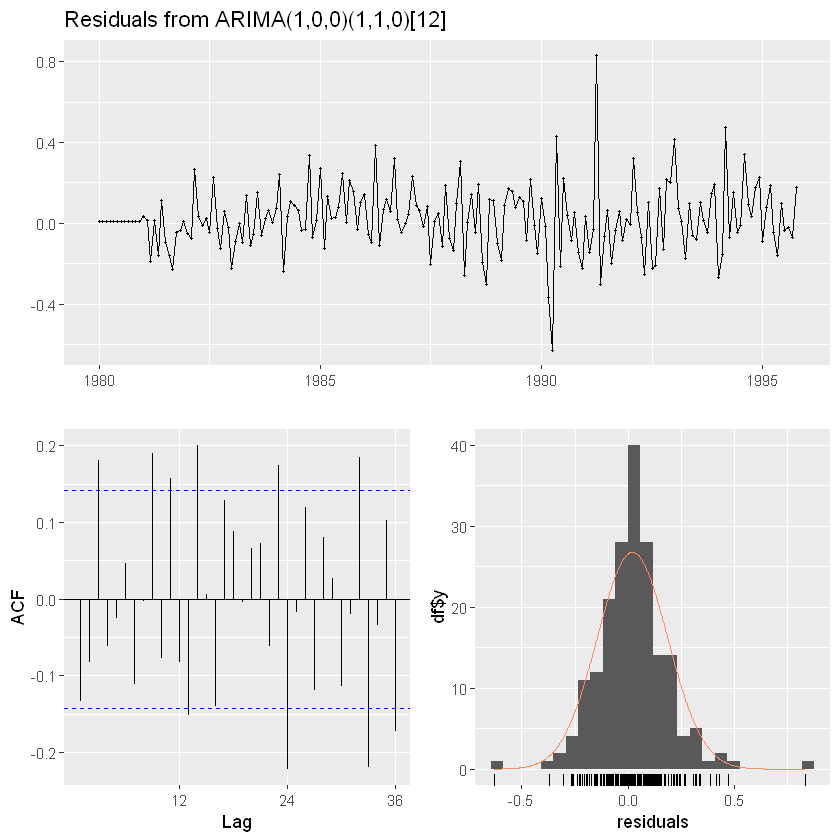

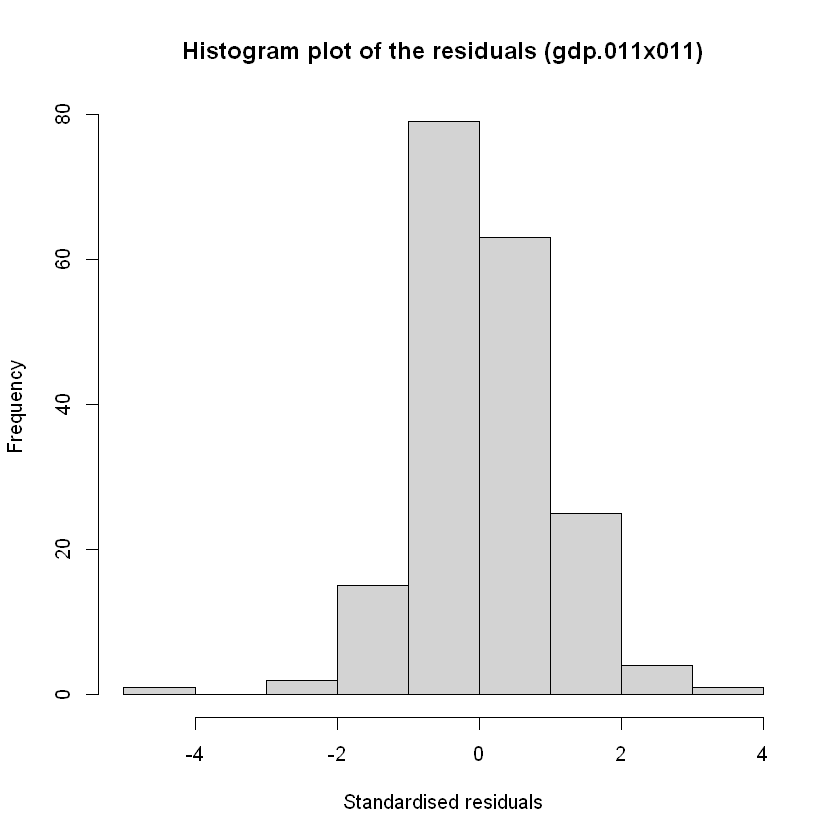

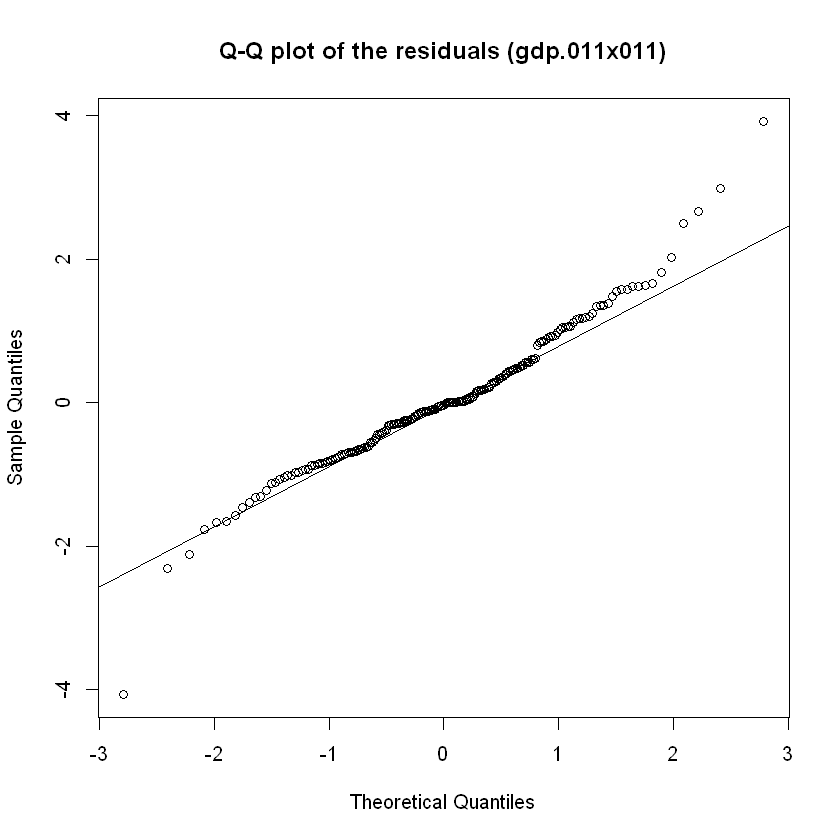

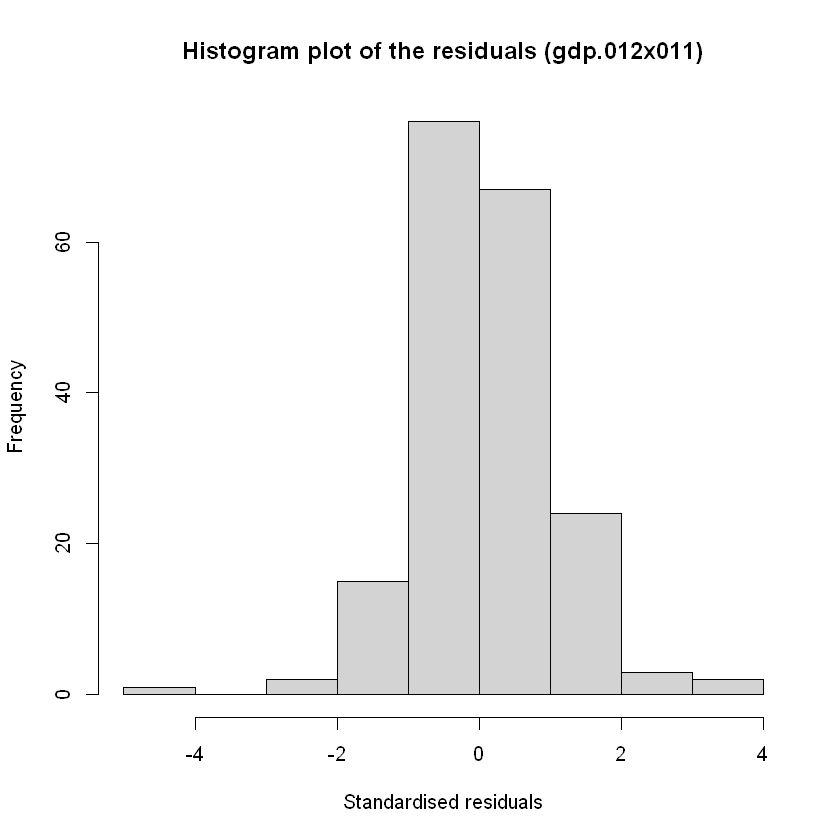

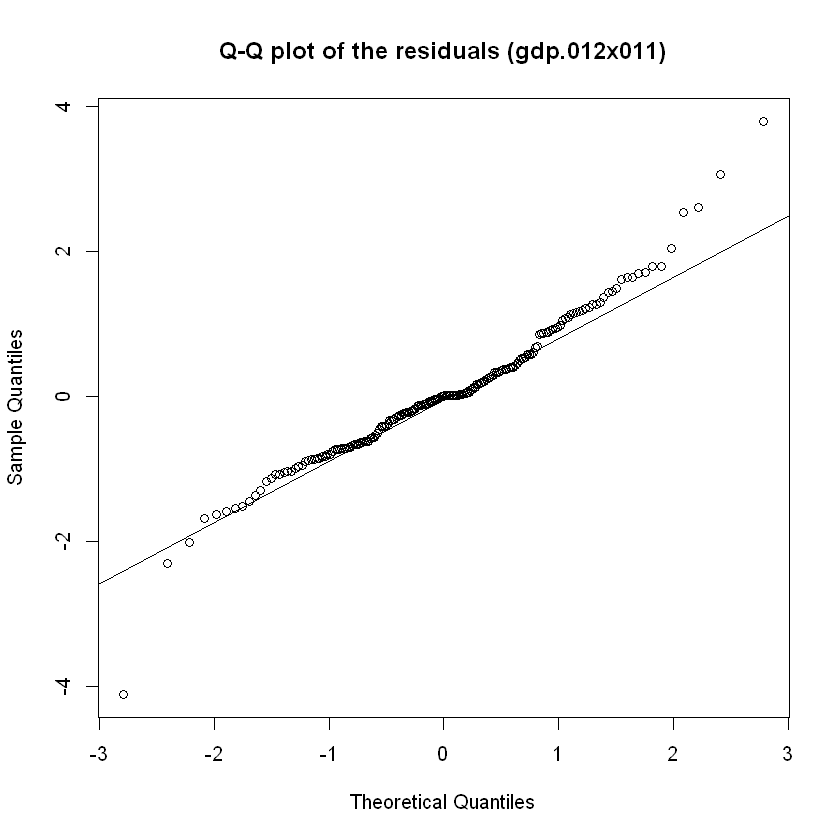

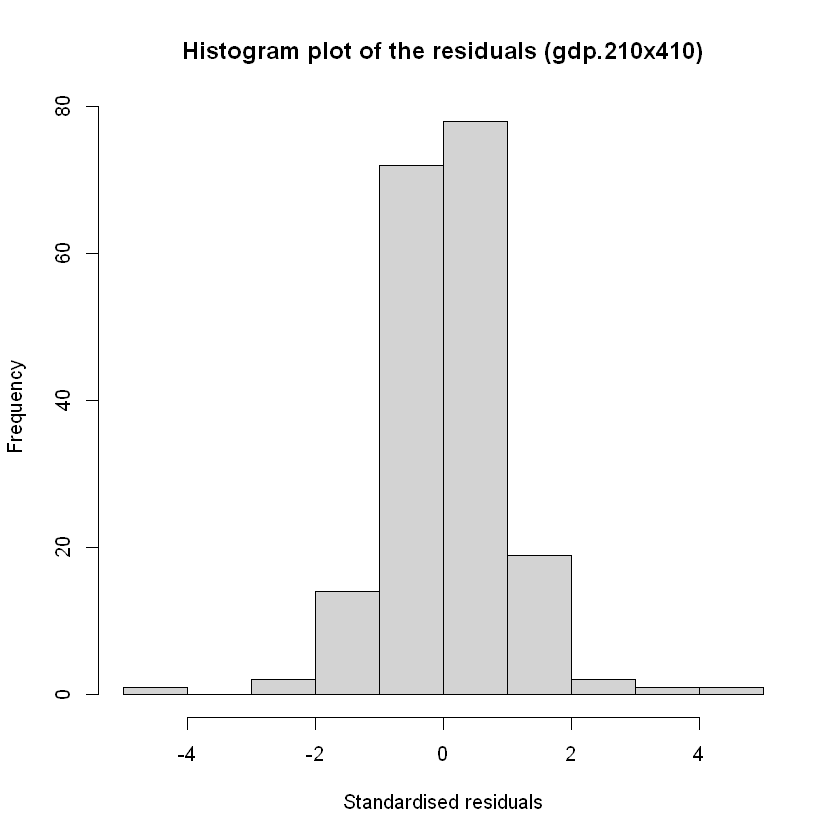

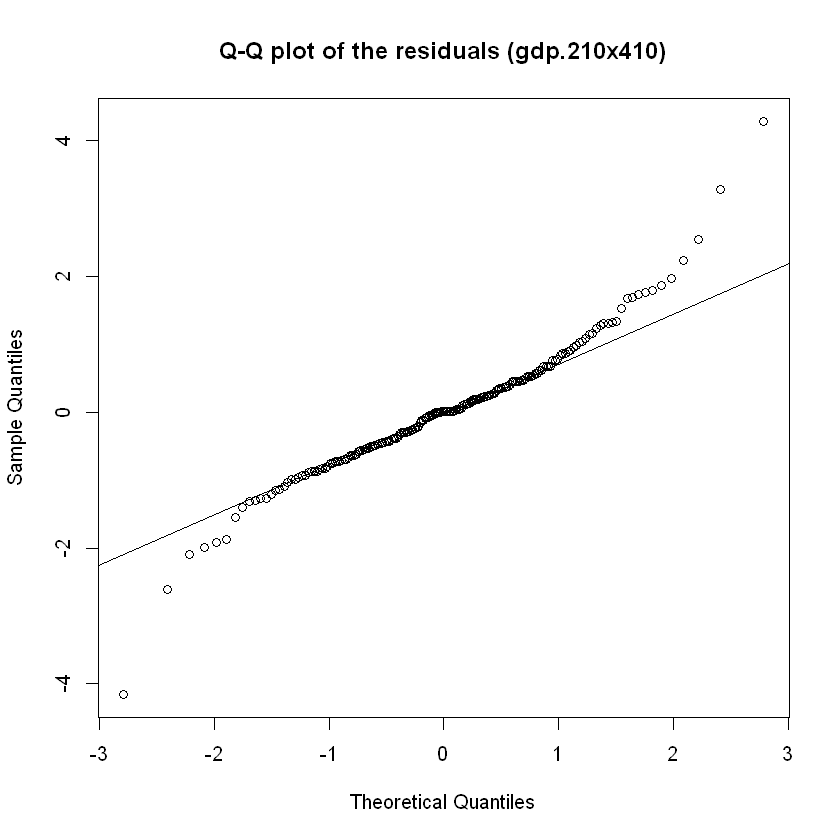

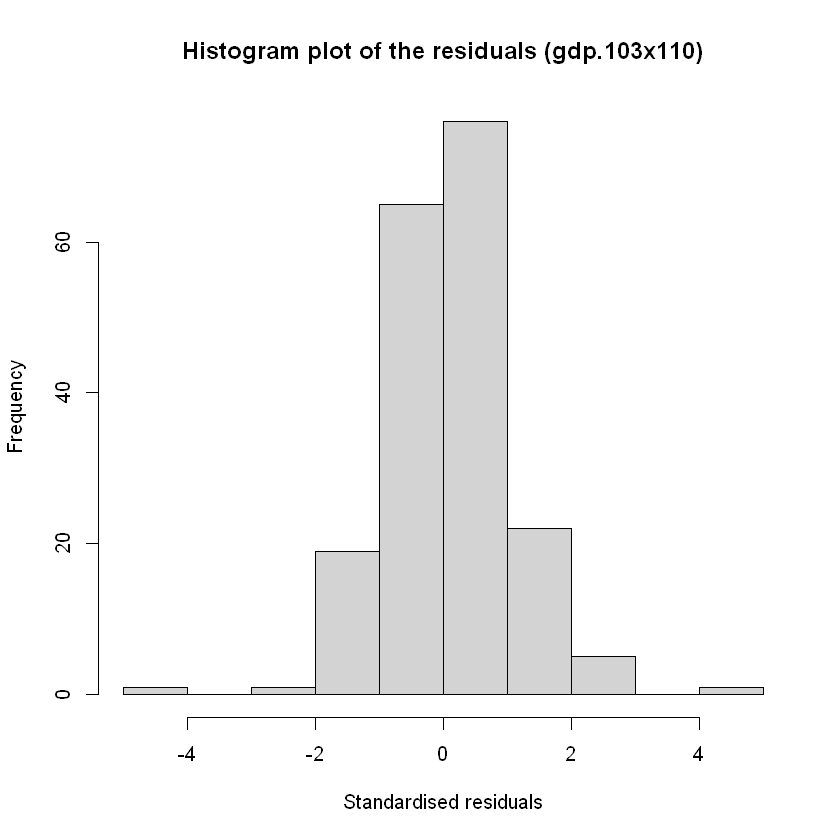

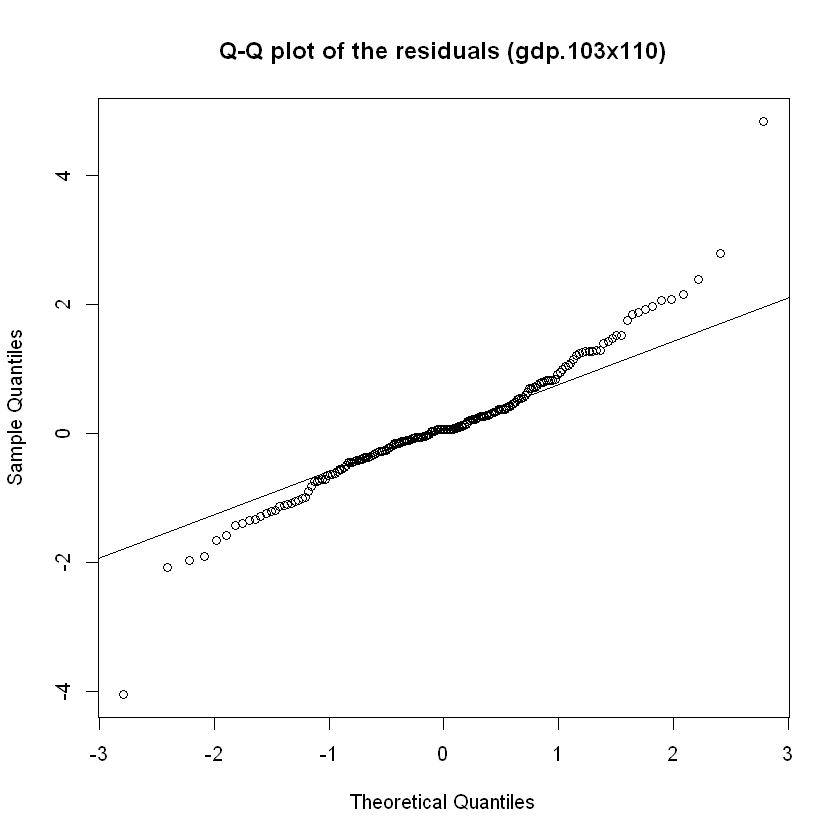

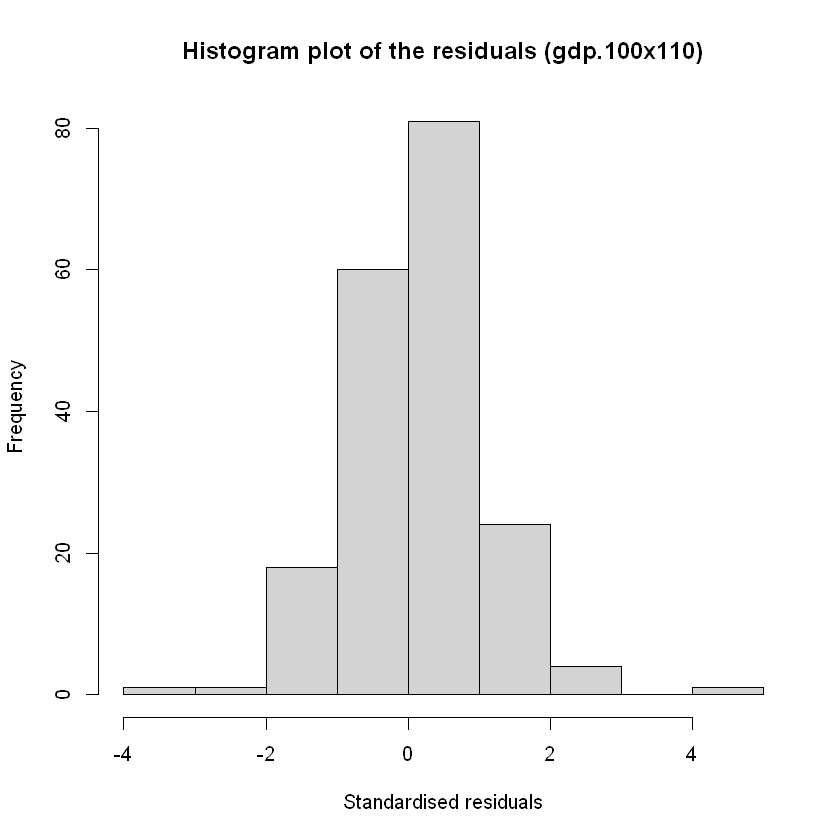

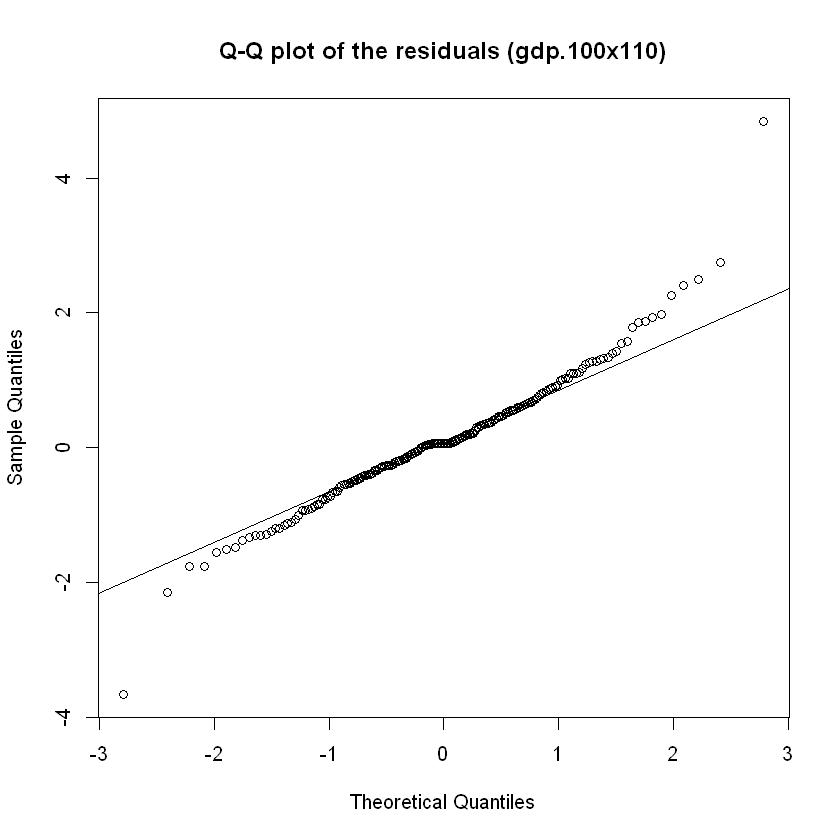

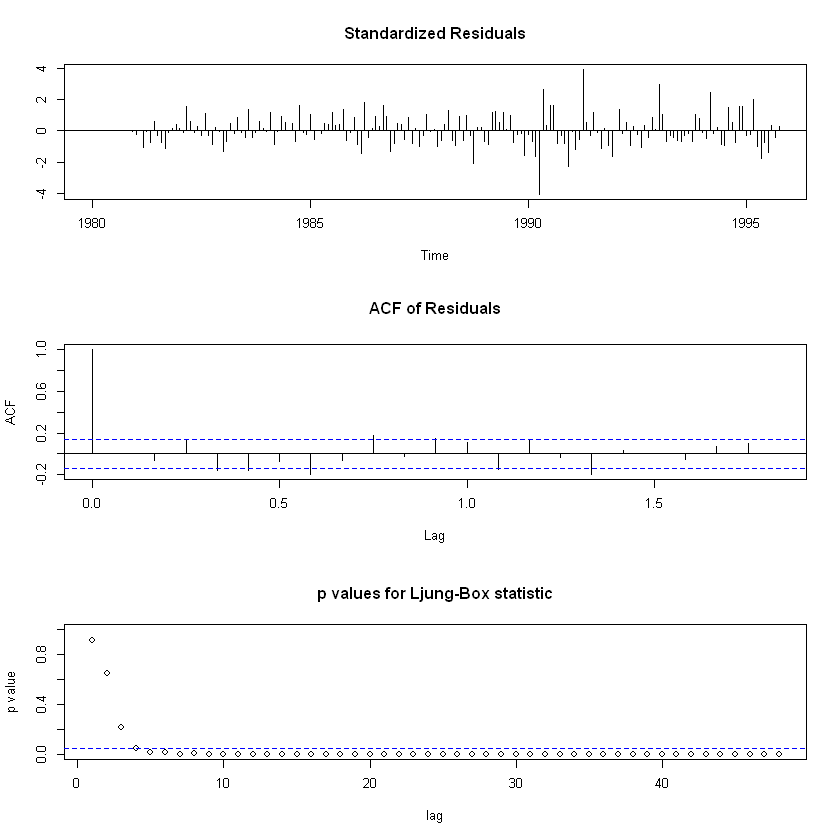

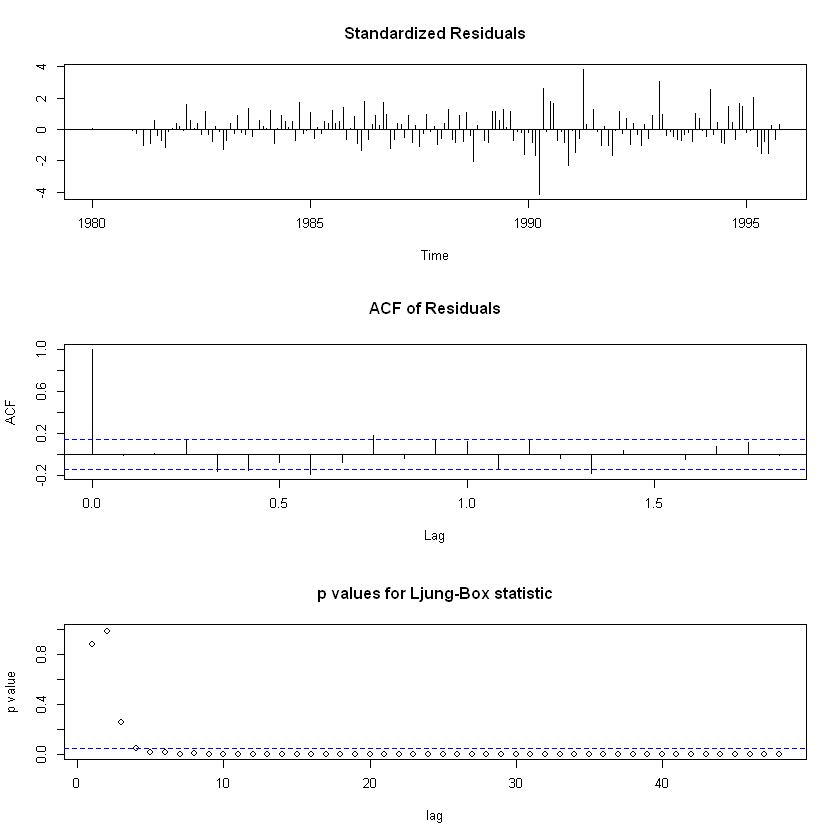

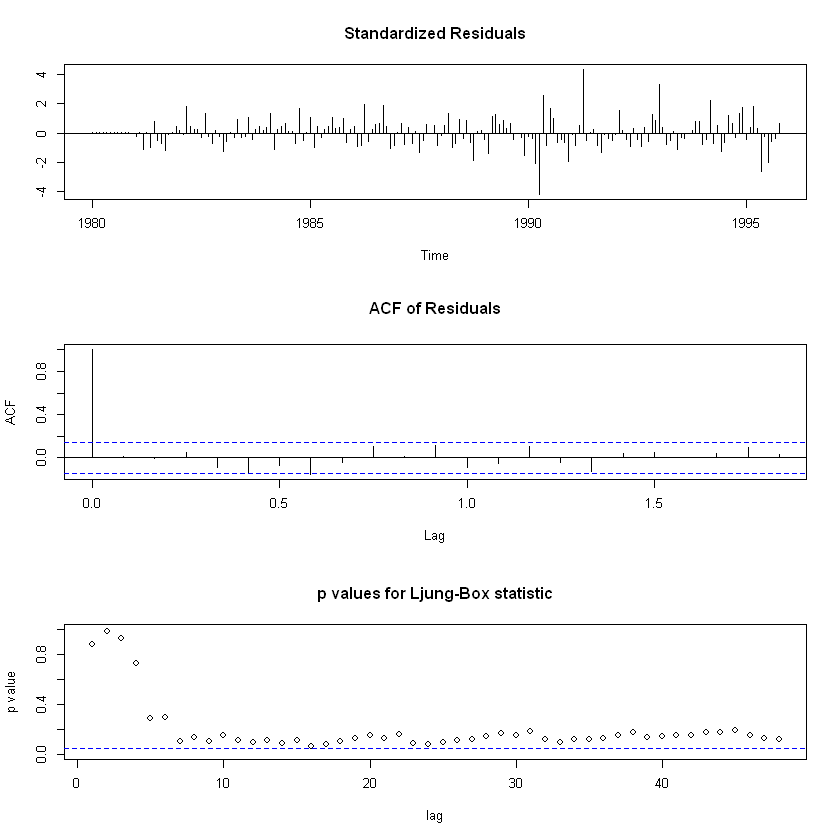

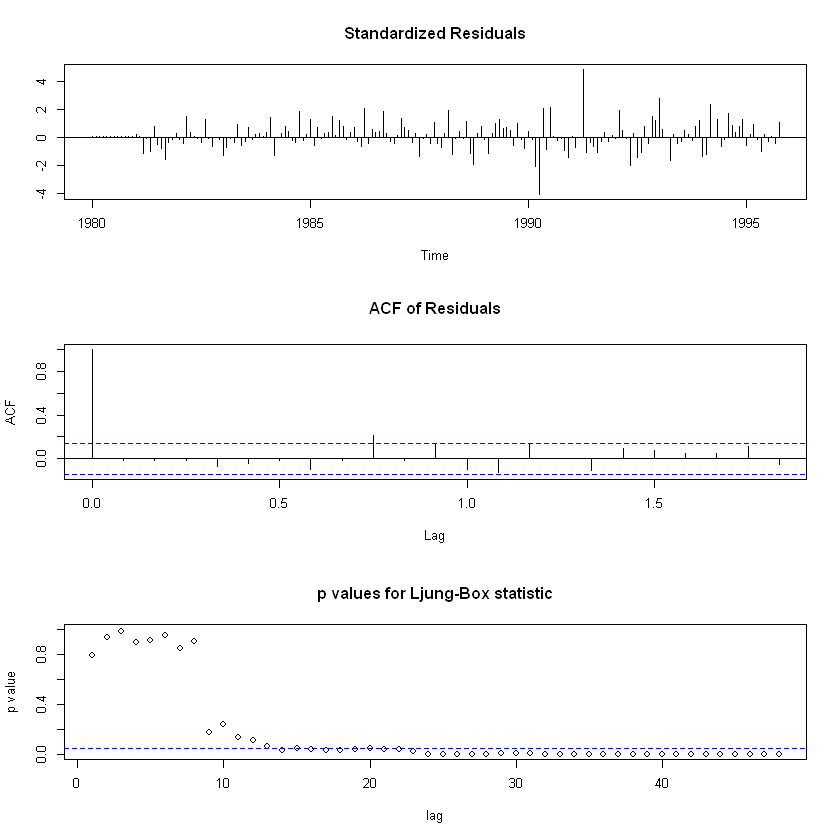


	Box-Ljung test

data:  residuals(gdp.011x011)
X-squared = 103.64, df = 34, p-value = 5.773e-09



	Box-Ljung test

data:  residuals(gdp.012x011)
X-squared = 104.57, df = 34, p-value = 4.173e-09



	Box-Ljung test

data:  residuals(gdp.210x410)
X-squared = 45.829, df = 34, p-value = 0.08468



	Box-Ljung test

data:  residuals(gdp.103x110)
X-squared = 74.341, df = 34, p-value = 7.776e-05



	Box-Ljung test

data:  residuals(gdp.100x110)
X-squared = 112.71, df = 34, p-value = 2.296e-10


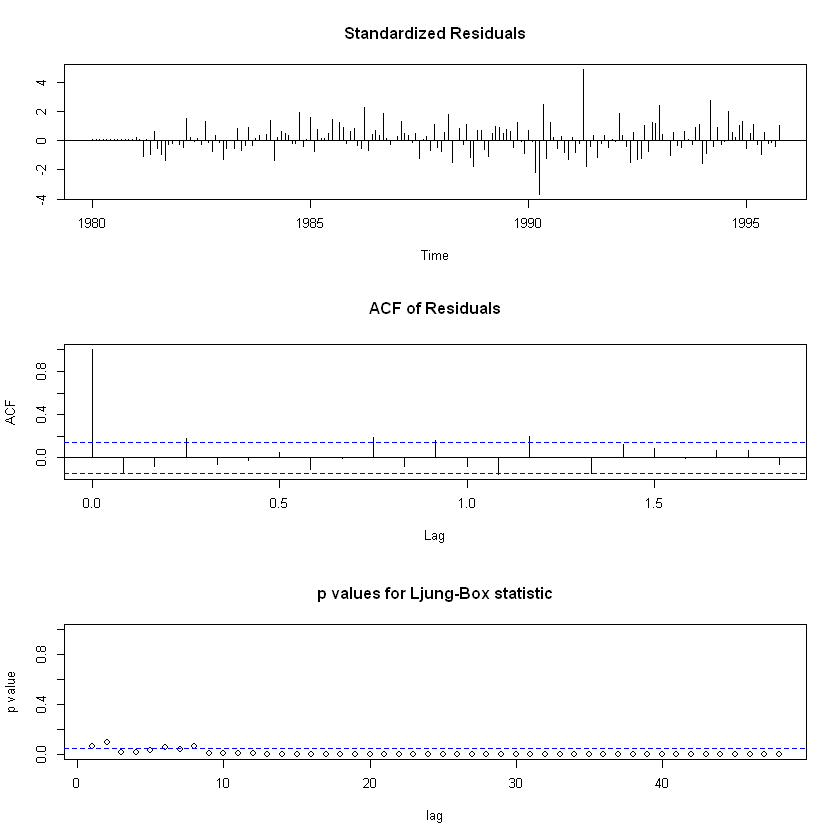

In [3]:
### c)

# Compare all candidate models using aic as criteria

gdp.011x011 <- arima(sqrt.gdp, order=c(0,1,1),method='ML', seasonal=list(order=c(0,1,1), period=12)) # aic = -149.72

gdp.012x011 <- arima(sqrt.gdp, order=c(0,1,2),method='ML', seasonal=list(order=c(0,1,1), period=12)) # aic = -148.55

gdp.210x410 <- arima(sqrt.gdp, order=c(2,1,0),method='ML', seasonal=list(order=c(4,1,0), period=12)) # aic = -148.67

gdp.103x110 <- arima(sqrt.gdp, order=c(1,0,3),method='ML', seasonal=list(order=c(1,1,0), period=12)) # aic = -118.95

gdp.100x110 <- arima(sqrt.gdp, order=c(1,0,0),method='ML', seasonal=list(order=c(1,1,0), period=12)) # aic = aic = -115.35


# quick check of residuals

checkresiduals(gdp.011x011) # has many spikes outside the bound of the acf plot

checkresiduals(gdp.012x011) # has many spikes outside the bound of the acf plot

checkresiduals(gdp.210x410) # gives the best acf plot. Almost all the spikes are within the bound

checkresiduals(gdp.103x110) # has about 3-4 spikes outside the bound of the acf plot

checkresiduals(gdp.100x110) # # has many spikes outside the bound of the acf plot


# Normality check for the residuals

# gdp.011x011
hist(rstandard(gdp.011x011), xlab="Standardised residuals", main="Histogram plot of the residuals (gdp.011x011)")
# doesn't look normal

qqnorm(rstandard(gdp.011x011), main="Q-Q plot of the residuals (gdp.011x011)")
qqline(rstandard(gdp.011x011))
# many points are off the fit line. Doesn't look good


# gdp.012x011
hist(rstandard(gdp.012x011), xlab="Standardised residuals", main="Histogram plot of the residuals (gdp.012x011)")
# Looks fairly good

qqnorm(rstandard(gdp.012x011), main="Q-Q plot of the residuals (gdp.012x011)")
qqline(rstandard(gdp.012x011))
# Poor fit. Doesn't look good


# gdp.210x410
hist(rstandard(gdp.210x410),xlab="Standardised residuals",main="Histogram plot of the residuals (gdp.210x410)")
# Looks normal. Gives the best histogram for normality.

qqnorm(rstandard(gdp.210x410),main="Q-Q plot of the residuals (gdp.210x410)")
qqline(rstandard(gdp.210x410))
# Gives the best fit.


# gdp.103x110
hist(rstandard(gdp.103x110),xlab="Standardised residuals",main="Histogram plot of the residuals (gdp.103x110)")
# Looks good

qqnorm(rstandard(gdp.103x110),main="Q-Q plot of the residuals (gdp.103x110)")
qqline(rstandard(gdp.103x110))
# Gives a better fit


# gdp.100x110
hist(rstandard(gdp.100x110),xlab="Standardised residuals",main="Histogram plot of the residuals (gdp.100x110)")
# Looks good

qqnorm(rstandard(gdp.100x110),main="Q-Q plot of the residuals (gdp.100x110)")
qqline(rstandard(gdp.100x110))
# Gives a better fit.


# Diagnostic Plots for Time-Series Fits

# gdp.011x011
tsdiag(gdp.011x011, gof=48, omit.initial=F)
# Almost all the p-values are below the 0.05
# Non-stationary residuals

# gdp.012x011
tsdiag(gdp.012x011, gof=48, omit.initial=F)
# Almost all the p-values are below the 0.05
# Non-stationary residuals


# gdp.210x410
tsdiag(gdp.210x410, gof=48, omit.initial=F)
# All the p-values are well above 0.05
# Stationary residuals


# gdp.103x110
tsdiag(gdp.103x110, gof=48, omit.initial=F)
# Many of the p-values < 0.05
# Residuals are non-stationary


# gdp.100x110
tsdiag(gdp.100x110, gof=48, omit.initial=F)
# Almost all the p-values are below the 0.05
# Non-stationary residuals


# test to check if the residuals resemble a white noise

Box.test(residuals(gdp.011x011),lag =36, type="Ljung-Box",fitdf=2) # do not resemble a white noise

#       Box-Ljung test
# 
# data:  residuals(gdp.011x011)
# X-squared = 103.64, df = 34, p-value = 5.773e-09


Box.test(residuals(gdp.012x011),lag =36, type="Ljung-Box",fitdf=2) # do not resemble a white noise

#       Box-Ljung test
# 
# data:  residuals(gdp.012x011)
# X-squared = 104.57, df = 34, p-value = 4.173e-09


Box.test(residuals(gdp.210x410),lag =36, type="Ljung-Box",fitdf=2) # resemble a white noise


#     Box-Ljung test
# 
# data:  residuals(gdp.210x410)
# X-squared = 45.829, df = 34, p-value = 0.08468


Box.test(residuals(gdp.103x110),lag =36, type="Ljung-Box",fitdf=2) # do not resemble a white noise

#     Box-Ljung test
# 
# data:  residuals(gdp.103x110)
# X-squared = 74.341, df = 34, p-value = 7.776e-05


Box.test(residuals(gdp.100x110),lag =36, type="Ljung-Box",fitdf=2) # do not resemble a white noise

#     Box-Ljung test
# 
# data:  residuals(gdp.100x110)
# X-squared = 112.71, df = 34, p-value = 2.296e-10


In [4]:
### d)

# Chosen best suitable model is SARIMA (2,1,0) x (4,1,0)_{12} => gdp.210x410

# Has the only residuals that behave like a white noise
# Gives the best acf plot
# Its residuals are convincingly stationary
# Gives the best normality check results
# Has ne of the smallest aic values


Call:
lm(formula = gdp.training.ts ~ t + sin(2 * pi * t/(12)) + cos(2 * 
    pi * t/(12)))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4394  -4.6424  -0.2381   4.6069  18.9167 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          93.503184   0.952651  98.150  < 2e-16 ***
t                     0.204551   0.008652  23.642  < 2e-16 ***
sin(2 * pi * t/(12)) -2.622752   0.668444  -3.924 0.000123 ***
cos(2 * pi * t/(12)) -6.024568   0.673252  -8.948 3.64e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.535 on 186 degrees of freedom
Multiple R-squared:  0.7823,	Adjusted R-squared:  0.7788 
F-statistic: 222.8 on 3 and 186 DF,  p-value: < 2.2e-16


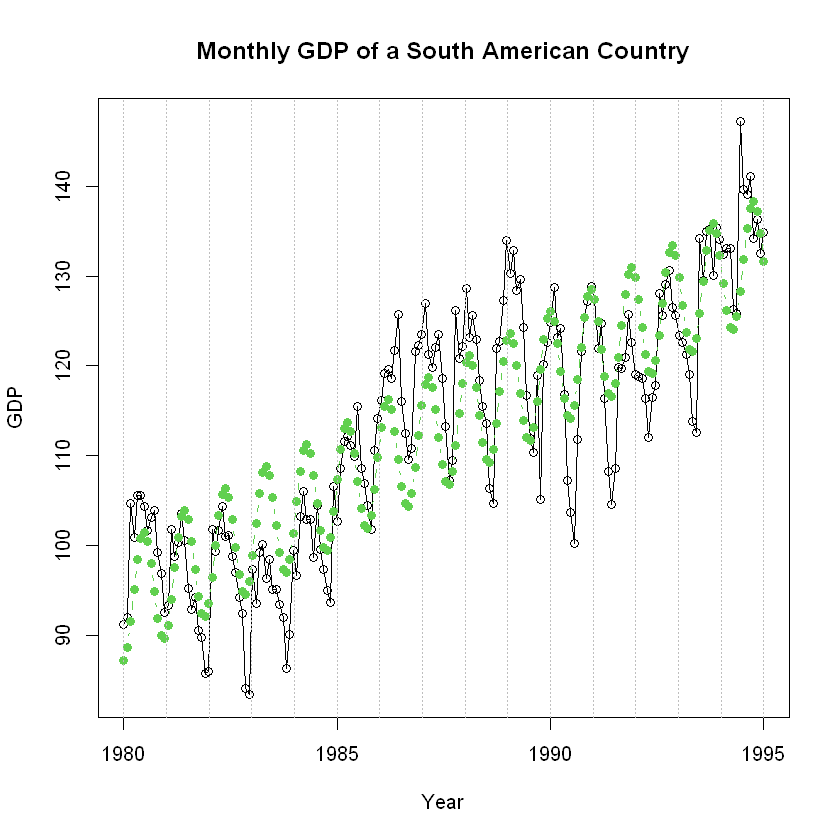

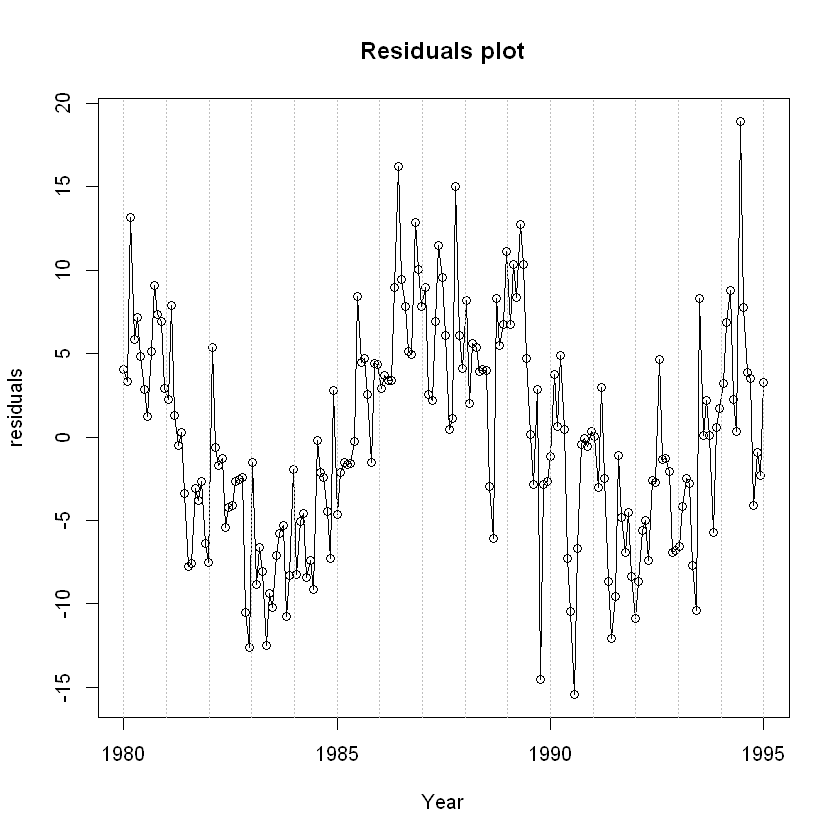

In [5]:
### Part 2

### a)

t = seq(1:190)

gdp.model <- lm(gdp.training.ts ~ t + sin(2*pi*t/(12)) + cos(2*pi*t/(12)))

summary(gdp.model)

# Call:
#   lm(formula = gdp.training.ts ~ t + sin(2 * pi * t/(12)) + cos(2 * 
#                                                                   pi * t/(12)))
# 
# Residuals:
#   Min       1Q   Median       3Q      Max 
# -15.4394  -4.6424  -0.2381   4.6069  18.9167 
# 
# Coefficients:
#                       Estimate Std. Error t value Pr(>|t|)    
# (Intercept)          93.503184   0.952651  98.150  < 2e-16 ***
# t                     0.204551   0.008652  23.642  < 2e-16 ***
# sin(2 * pi * t/(12)) -2.622752   0.668444  -3.924 0.000123 ***
# cos(2 * pi * t/(12)) -6.024568   0.673252  -8.948 3.64e-16 ***
#   ---
#   Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
# 
# Residual standard error: 6.535 on 186 degrees of freedom
# Multiple R-squared:  0.7823,	Adjusted R-squared:  0.7788 
# F-statistic: 222.8 on 3 and 186 DF,  p-value: < 2.2e-16


x.points = seq(1980, 1995, length.out = 190)

plot(x.points, gdp.training.ts, ylab = 'GDP', xlab = 'Year', type='o', main='Monthly GDP of a South American Country')

lines(x.points, gdp.model$fitted.values, type = 'b', pch=16, col=3)
abline(v=1980:1995, col='grey', lty=3)

# residuals plot
plot(x.points, gdp.model$residuals, type = 'o', ylab = 'residuals', xlab = 'Year', main='Residuals plot')
abline(v=1980:1995, col='grey', lty=3)


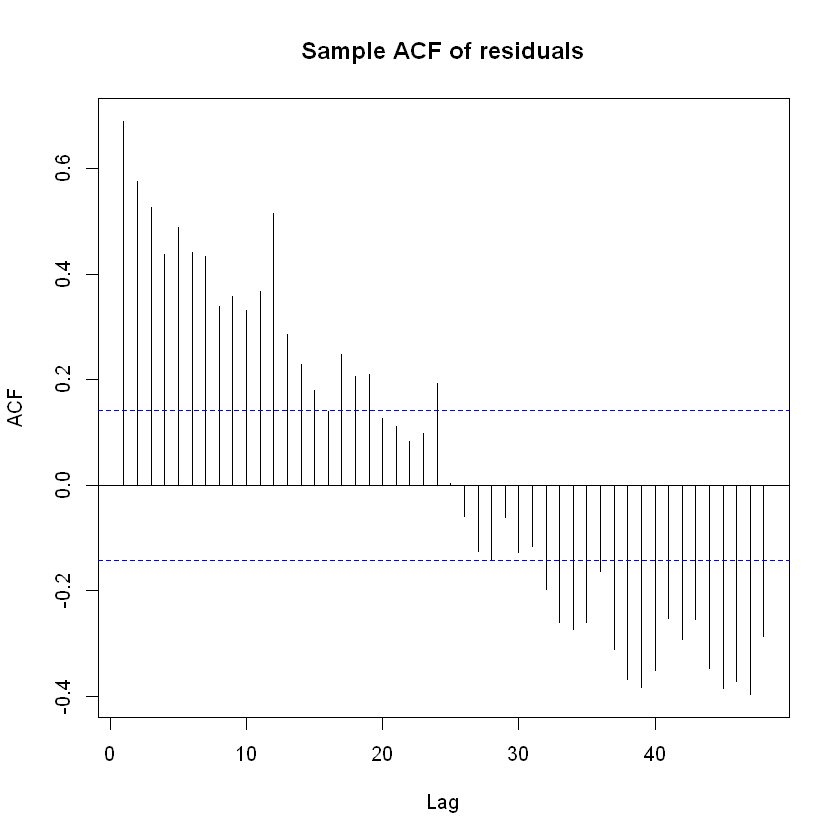

Series: gdp.model$residuals 
ARIMA(4,0,3) with zero mean 

Coefficients:
          ar1     ar2     ar3      ar4     ma1      ma2      ma3
      -0.3309  0.9992  0.5799  -0.3537  0.9687  -0.4840  -0.6913
s.e.   0.1440  0.1059  0.0825   0.1171  0.1311   0.1556   0.0876

sigma^2 = 17.79:  log likelihood = -540.7
AIC=1097.4   AICc=1098.19   BIC=1123.38

Series: gdp.model$residuals 
ARIMA(3,0,1) with zero mean 

Coefficients:
          ar1     ar2     ar3     ma1
      -0.2260  0.5093  0.3165  0.8120
s.e.   0.0882  0.0749  0.0701  0.0637

sigma^2 = 19.9:  log likelihood = -552.26
AIC=1114.53   AICc=1114.85   BIC=1130.76

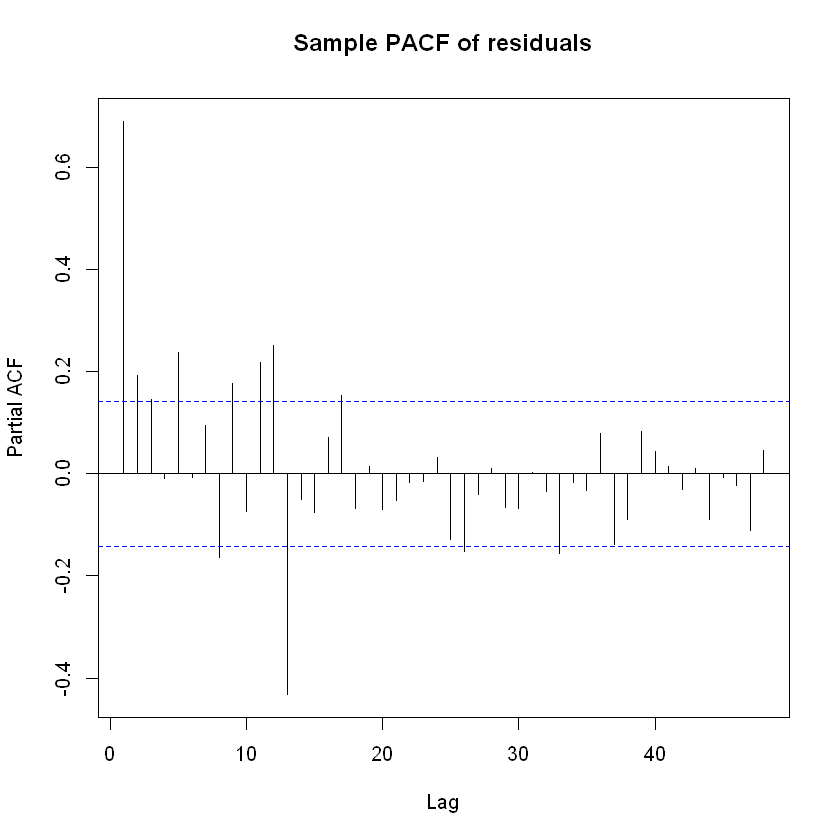

In [6]:
### b)

acf(gdp.model$residuals, main='Sample ACF of residuals', lag.max = 48)
# seasonal lags: 3/4 signif. spikes at lags at 12, 24, 36, 48 => SARIMA(0,0,4)_{12}
# exponentially decaying feature

pacf(gdp.model$residuals, main='Sample PACF of residuals', lag.max = 48)

# seasonal lags: 1 signif. spike at lag 12 => SARIMA(1,0,0)_{12}
# simple lags: 2 signif. spikes at lags 1, 2, 5 => ARIMA(2/5,0,0)


# Automatic model selection
auto.arima(gdp.model$residuals, ic='aic') # ARIMA(4,0,3)

auto.arima(gdp.model$residuals, ic='bic') # ARIMA(3,0,1)

# suggested candidate models for the residuals

# i) SARIMA (2,0,0) x (0,0,4)_{12}

# ii) SARIMA (2,0,0) x (0,0,3)_{12}

# iii) SARIMA (2,0,0) x (1,0,0)_{12}

# iv) ARIMA(4,0,3)

# v) ARIMA(3,0,1)

# Compare all candidate models using aic as criteria

gdp.200x004 <- arima(gdp.model$residuals, order=c(2,0,0),method='ML', seasonal=list(order=c(0,0,4), period=12)) # aic = 1039.29

gdp.200x003 <- arima(gdp.model$residuals, order=c(2,0,0),method='ML', seasonal=list(order=c(0,0,3), period=12)) # aic = 1037.34

gdp.200x100 <- arima(gdp.model$residuals, order=c(2,0,0),method='ML', seasonal=list(order=c(1,0,0), period=12)) # aic = 1031.23

gdp.403 <- arima(gdp.model$residuals, order = c(4,0,3), method = 'ML') # aic = 1097.33

gdp.301 <- arima(gdp.model$residuals, order = c(3,0,1), method = 'ML') # aic = 1114.51

# The best fitted stationary model for the residuals is gdp.200x100


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0)(1,0,0)[12] with non-zero mean
Q* = 5.9627, df = 7, p-value = 0.5441

Model df: 3.   Total lags used: 10



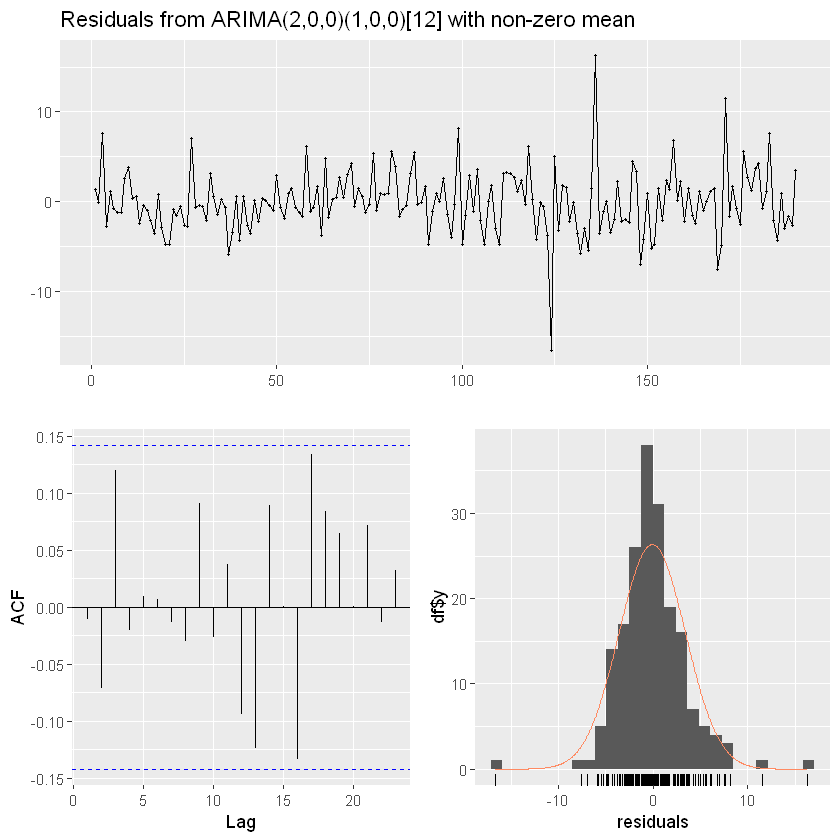

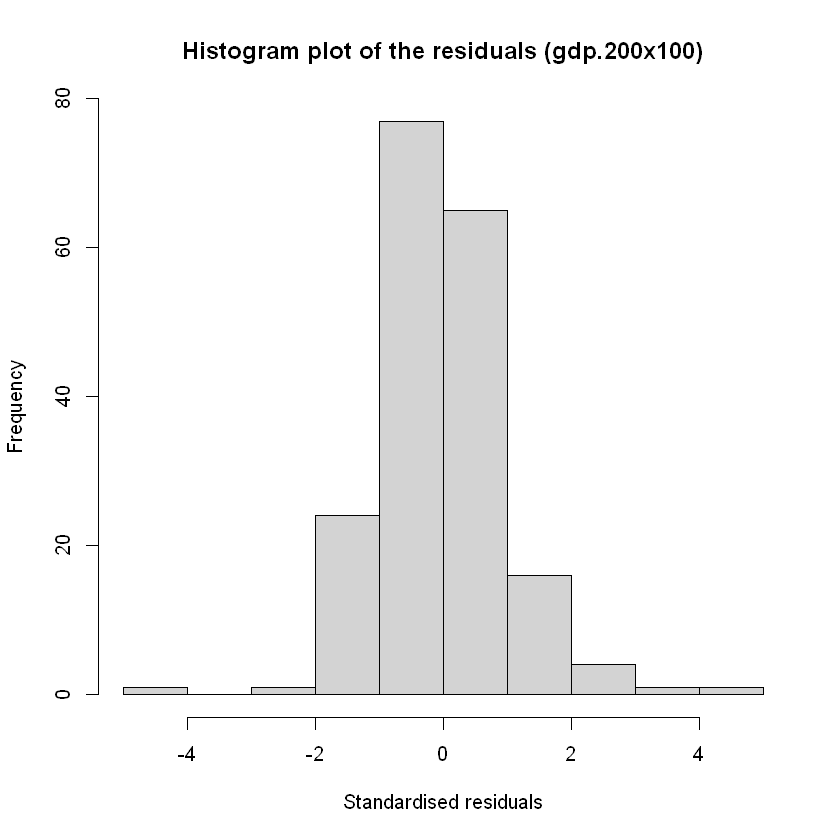

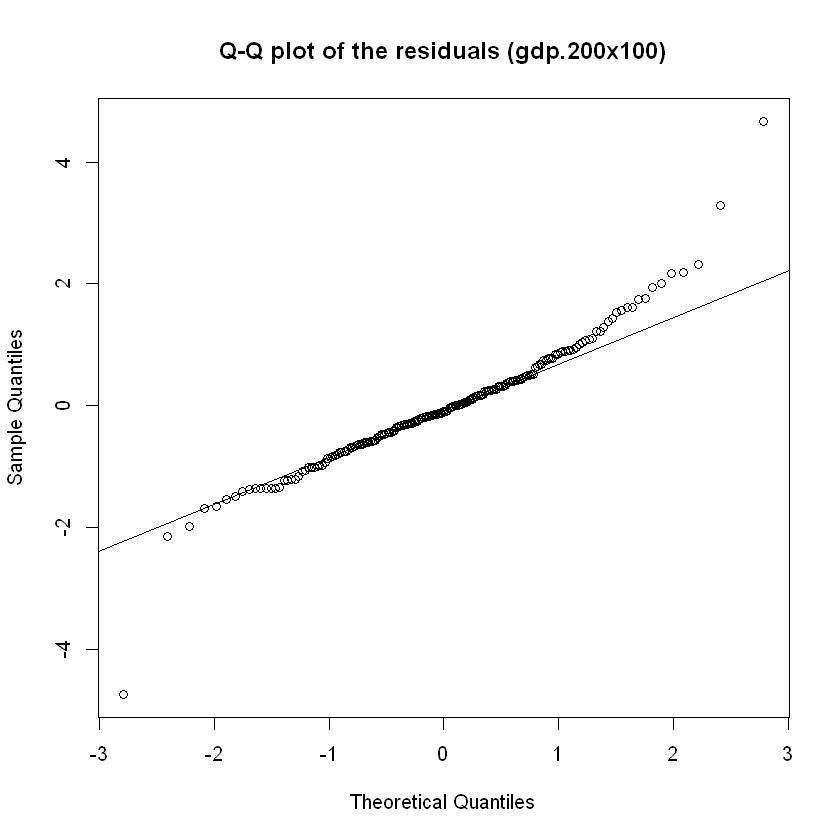


	Box-Ljung test

data:  residuals(gdp.200x100)
X-squared = 38.173, df = 34, p-value = 0.2854


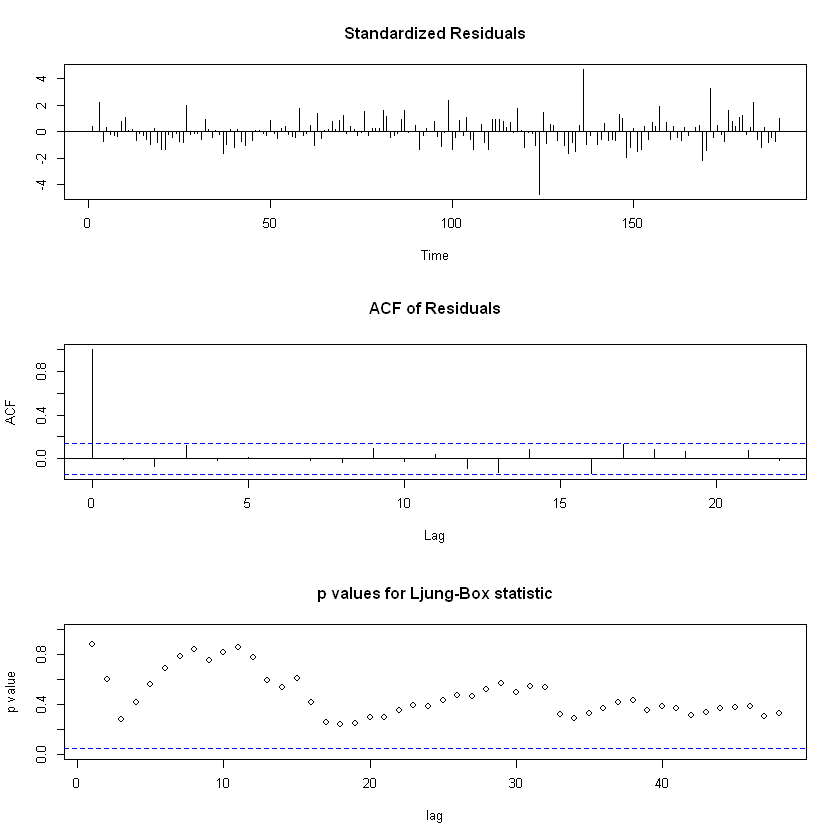

In [7]:
### c)

# quick check of residuals
checkresiduals(gdp.200x100) # All the plots look perfect


# Normality check for the residuals

hist(rstandard(gdp.200x100), xlab="Standardised residuals", main="Histogram plot of the residuals (gdp.200x100)")
# looks good

qqnorm(rstandard(gdp.200x100), main="Q-Q plot of the residuals (gdp.200x100)")
qqline(rstandard(gdp.200x100))
#Fairly good fit

# Diagnostic Plots for Time-Series Fits
tsdiag(gdp.200x100, gof=48, omit.initial=F)
# All p-values > 0.05
# stationary residuals

# test to check if the residuals resemble a white noise
Box.test(residuals(gdp.200x100),lag =36, type="Ljung-Box",fitdf=2) # p-value = 0.2854 => stationarity

#       Box-Ljung test
# 
# data:  residuals(gdp.200x100)
# X-squared = 38.173, df = 34, p-value = 0.2854

In [8]:
### Part 3

### a)

gdp.210x410.sqrtpredict <- predict(gdp.210x410, n.ahead=26)

gdp.210x410.predict <- gdp.210x410.sqrtpredict$pred^2 # forecasted values

#         Jan      Feb      Mar      Apr      May      Jun      Jul      Aug      Sep      Oct      Nov      Dec
# 1995                                                                                           130.9474 125.4728
# 1996 120.6988 119.1788 135.9905 136.7641 139.0336 140.9797 138.0186 138.6647 134.6258 136.5053 131.3264 125.3798
# 1997 121.2723 122.4003 137.6055 136.6162 138.3552 141.4886 137.7218 136.7959 134.4862 135.3581 131.8202 126.8477

In [9]:
gdp.210x410.sqrtpredict
gdp.210x410.predict

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1995,,,,,,,,,,,11.44323,11.20147
1996,10.98630,10.91691,11.66149,11.69462,11.79125,11.87349,11.74813,11.77560,11.60284,11.68355,11.45977,11.19731
1997,11.01237,11.06347,11.73054,11.68829,11.76245,11.89490,11.73549,11.69598,11.59682,11.63435,11.48130,11.26267
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1995,,,,,,,,,,,0.1476513,0.1956006
1996,0.2231602,0.2502440,0.2757292,0.2985673,0.3196929,0.3395840,0.3583752,0.3762177,0.3932525,0.4095810,0.4438405,0.4730258
1997,0.4979604,0.5223714,0.5459738,0.5684637,0.5900724,0.6109401,0.6311190,0.6506689,0.6696486,0.6881055,0.7161085,0.7416747


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1995,,,,,,,,,,,130.9474,125.4728
1996,120.6988,119.1788,135.9905,136.7641,139.0336,140.9797,138.0186,138.6647,134.6258,136.5053,131.3264,125.3798
1997,121.2723,122.4003,137.6055,136.6162,138.3552,141.4886,137.7218,136.7959,134.4862,135.3581,131.8202,126.8477


Month,lower.gdp,forecast,upper.gdp
<int>,<ts>,<ts>,<ts>
191,124.40805,130.9474,137.6543
192,117.03119,125.4728,134.2084
193,111.27962,120.6988,130.5006
194,108.71057,119.1788,130.1282
195,123.67831,135.9905,148.8867
196,123.41963,136.7641,150.7935
197,124.64973,139.0336,154.2027
198,125.61735,140.9797,157.2280
199,122.00809,138.0186,155.0158


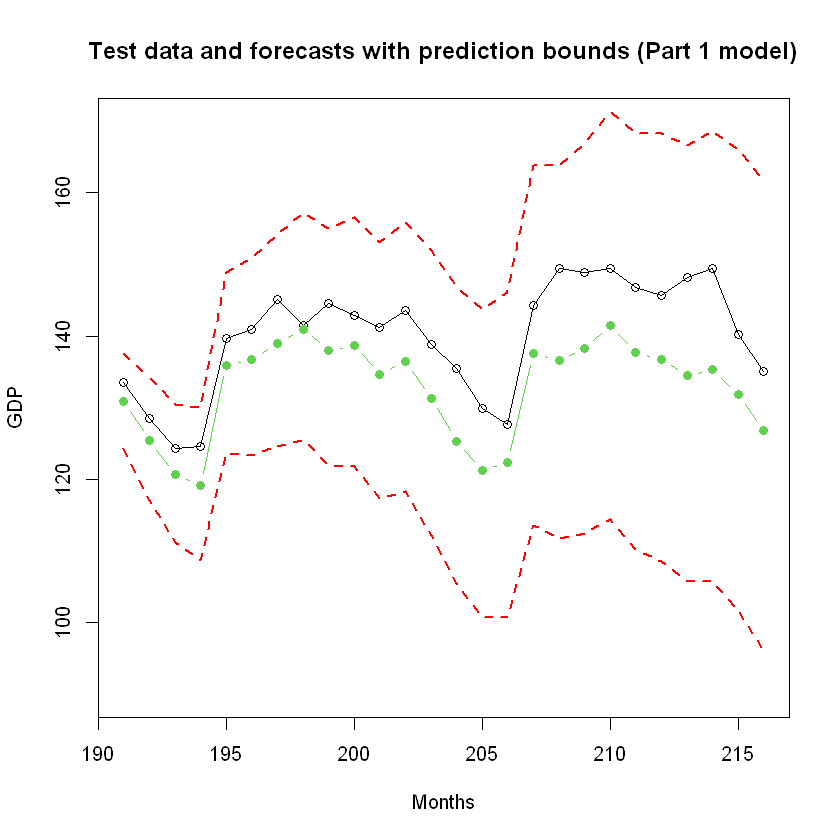

In [10]:
### b)

# Lower and upper bounds prediction interval

lower.gdp <- gdp.210x410.sqrtpredict$pred - qnorm(0.975, 0, 1) * gdp.210x410.sqrtpredict$se
upper.gdp <- gdp.210x410.sqrtpredict$pred + qnorm(0.975, 0, 1) * gdp.210x410.sqrtpredict$se

lower.gdp <- lower.gdp^2
upper.gdp <- upper.gdp^2

# Create a data frame for the predicted intervals for 191-216
data.frame(Month=c(191:216), lower.gdp, forecast = gdp.210x410.predict, upper.gdp)

# Plot of the test data and forecasts with prediction bounds

plot(seq(191, 216), gdp.test, type = 'o', ylim = c(90, 170), ylab = "GDP", xlab = 'Months',
     main='Test data and forecasts with prediction bounds (Part 1 model)')

lines(seq(191, 216), gdp.210x410.predict, type='b', pch=16, col=3 )

# Put prediction interval lines on plot (darker than default)
lines(seq(191, 216), lower.gdp, lwd=2, col="red", lty="dashed")
lines(seq(191, 216), upper.gdp, lwd=2, col="red", lty="dashed")


Call:
lm(formula = gdp.training.ts ~ t + sin(2 * pi * t/(12)) + cos(2 * 
    pi * t/(12)))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4394  -4.6424  -0.2381   4.6069  18.9167 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          93.503184   0.952651  98.150  < 2e-16 ***
t                     0.204551   0.008652  23.642  < 2e-16 ***
sin(2 * pi * t/(12)) -2.622752   0.668444  -3.924 0.000123 ***
cos(2 * pi * t/(12)) -6.024568   0.673252  -8.948 3.64e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.535 on 186 degrees of freedom
Multiple R-squared:  0.7823,	Adjusted R-squared:  0.7788 
F-statistic: 222.8 on 3 and 186 DF,  p-value: < 2.2e-16


Month,lower.gdp,forecast,upper.gdp
<int>,<ts>,<ts>,<ts>
191,131.4629,138.3229,145.1829
192,128.2611,136.5113,144.7615
193,120.5705,129.6563,138.7422
194,117.7510,127.3320,136.9129
195,130.5056,140.3934,150.2812
196,125.1922,135.2729,145.3536
197,125.8320,136.0352,146.2384
198,129.0984,139.3799,149.6613
199,126.8334,137.1650,147.4966


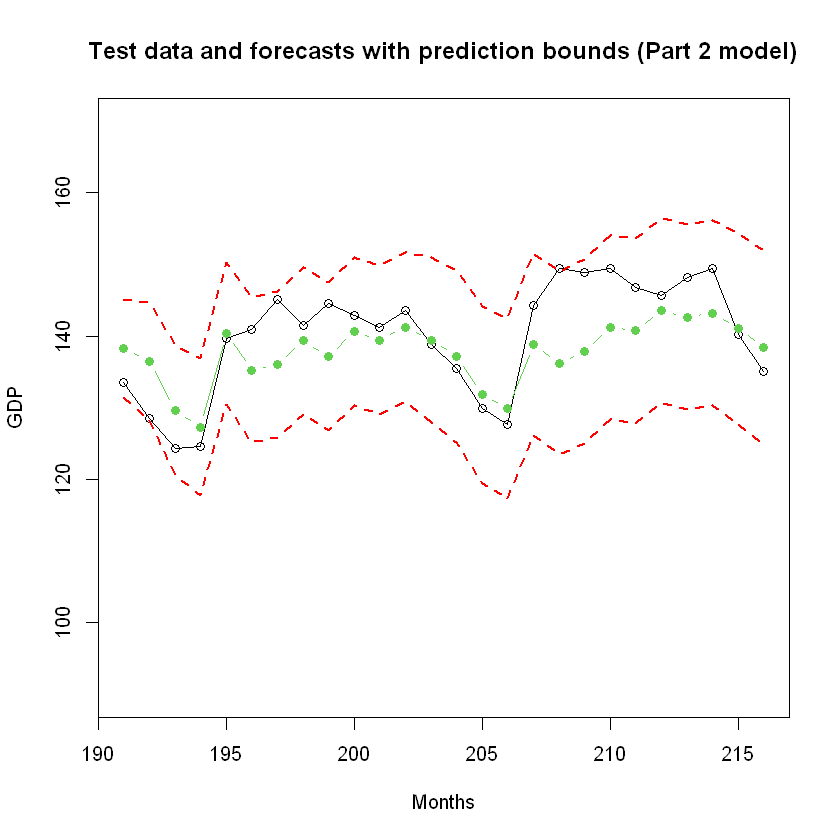

In [11]:
### c)

summary(gdp.model)
beta0.hat <- 93.503184

beta1.hat <- 0.204551

a.hat <- -2.622752

b.hat <- -6.024568

t <- seq(191, 216)

# estimated mean
mu.hat <- beta0.hat + beta1.hat*t + a.hat*cos(pi*t/(6)) + b.hat*sin(pi*t/(6))

# overall prediction
gdp.model.predict <- mu.hat + predict(gdp.200x100, n.ahead = 26)$pred

# Lower and upper bounds prediction interval
lower.gdp <- gdp.model.predict - qnorm(0.975, 0, 1) * predict(gdp.200x100, n.ahead = 26)$se
upper.gdp <- gdp.model.predict + qnorm(0.975, 0, 1) * predict(gdp.200x100, n.ahead = 26)$se


# Create a data frame for the predicted intervals for 191-216
data.frame(Month=c(191:216), lower.gdp, forecast = gdp.model.predict, upper.gdp)

# Plot of the test data and forecasts with prediction bounds

plot(seq(191, 216), gdp.test, type = 'o', ylim = c(90, 170), ylab = "GDP", xlab = 'Months',
     main='Test data and forecasts with prediction bounds (Part 2 model)')

lines(seq(191, 216), gdp.model.predict, type='b', pch=16, col=3 )

# Put prediction interval lines on plot (darker than default)
lines(seq(191, 216), lower.gdp, lwd=2, col="red", lty="dashed")
lines(seq(191, 216), upper.gdp, lwd=2, col="red", lty="dashed")

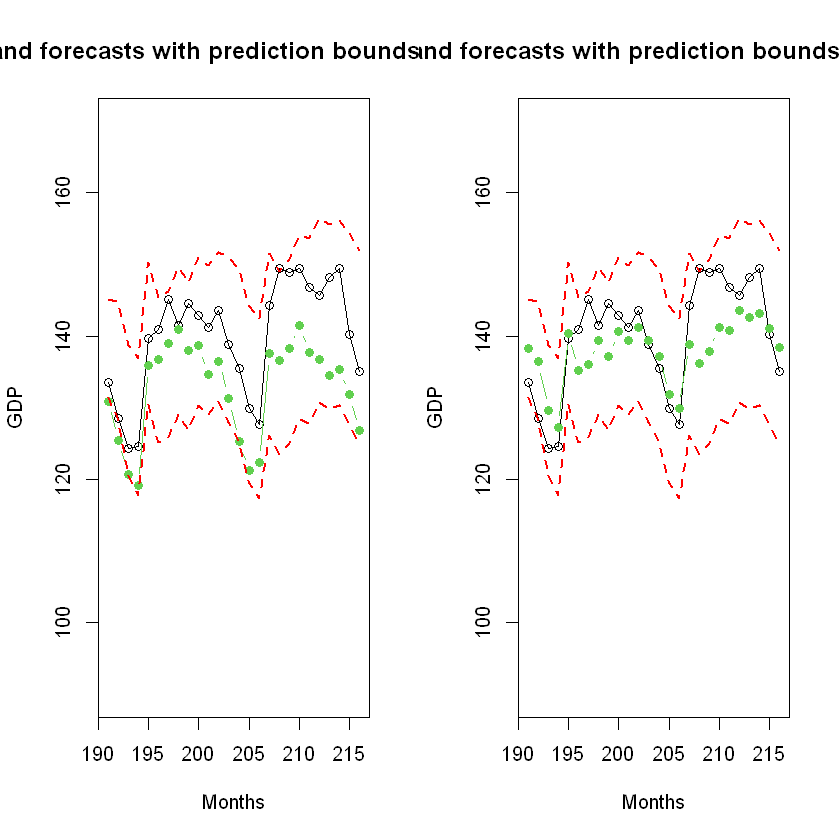

In [12]:
### d)

par(mfrow=c(1,2))

# Model from Part 1
plot(seq(191, 216), gdp.test, type = 'o', ylim = c(90, 170), ylab = "GDP", xlab = 'Months',
     main='Test data and forecasts with prediction bounds (Part 1 model)')

lines(seq(191, 216), gdp.210x410.predict, type='b', pch=16, col=3 )

# Put prediction interval lines on plot (darker than default)
lines(seq(191, 216), lower.gdp, lwd=2, col="red", lty="dashed")
lines(seq(191, 216), upper.gdp, lwd=2, col="red", lty="dashed")

# Model from Part 2
plot(seq(191, 216), gdp.test, type = 'o', ylim = c(90, 170), ylab = "GDP", xlab = 'Months',
     main='Test data and forecasts with prediction bounds (Part 2 model)')

lines(seq(191, 216), gdp.model.predict, type='b', pch=16, col=3 )

# Put prediction interval lines on plot (darker than default)
lines(seq(191, 216), lower.gdp, lwd=2, col="red", lty="dashed")
lines(seq(191, 216), upper.gdp, lwd=2, col="red", lty="dashed")

# Generally, the model in Part 1 produces wider prediction intervals
# than the model in Part 2. It gives more room for uncertainties.